JUST FOR SHOWING FEATURE IMPORTANCE FOR GOOD REVIEWS

In [3]:
import pandas as pd
master_df = pd.read_csv('outputs/cleaned_olist_data.csv')
import matplotlib.pyplot as plt
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])

              precision    recall  f1-score   support

           0       0.62      0.44      0.52      2395
           1       0.85      0.92      0.89      8292

    accuracy                           0.81     10687
   macro avg       0.74      0.68      0.70     10687
weighted avg       0.80      0.81      0.80     10687



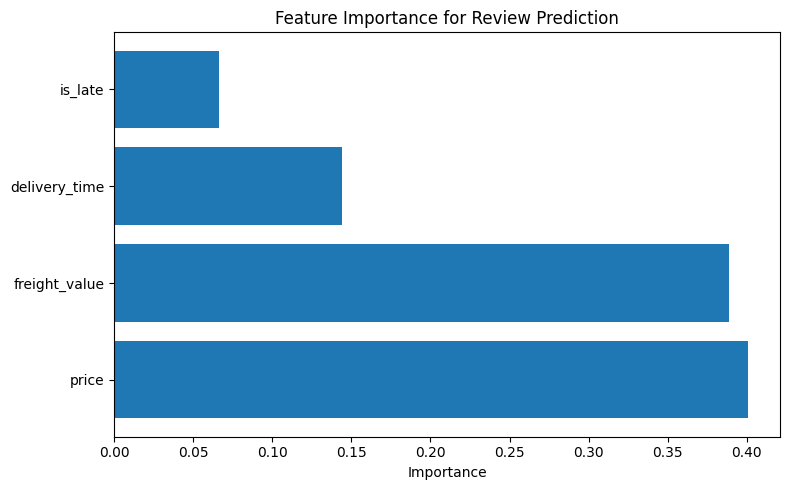

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Predict review score (good vs bad)
model_data = master_df[['price', 'freight_value', 'delivery_time', 
                         'is_late', 'review_score']].dropna()
model_data['good_review'] = (model_data['review_score'] >= 4).astype(int)

X = model_data[['price', 'freight_value', 'delivery_time', 'is_late']]
y = model_data['good_review']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_imp['feature'], feature_imp['importance'])
plt.title('Feature Importance for Review Prediction')
plt.xlabel('Importance')
plt.tight_layout()
# plt.savefig('feature_importance.png')
plt.show()